In [ ]:
!pip install yfinance
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import yfinance as yf

In [ ]:
def monte_carlo_option_pricing(S0, K, T, r, sigma, num_simulations=100000, num_steps=250):
    """
    Monte Carlo simulation for European call and put option pricing.

    Parameters:
    S0: Initial stock price
    K: Strike price
    T: Time to maturity (in years)
    r: Risk-free interest rate
    sigma: Volatility (annualized)
    num_simulations: Number of Monte Carlo paths
    num_steps: Number of time steps in the simulation

    Returns:
    Call and Put option prices
    """
    dt = T / num_steps  # Time increment
    Z = np.random.randn(num_simulations, num_steps)  # Standard normal draws
    S = np.zeros((num_simulations, num_steps + 1))  # Stock price paths
    S[:, 0] = S0  # Initial stock price

    for t in range(1, num_steps + 1):
        S[:, t] = S[:, t - 1] * np.exp((r - 0.5 * sigma ** 2) * dt + sigma * np.sqrt(dt) * Z[:, t - 1])

    S_T = S[:, -1]  # Final stock prices at maturity
    call_payoffs = np.maximum(S_T - K, 0)
    put_payoffs = np.maximum(K - S_T, 0)

    call_price = np.exp(-r * T) * np.mean(call_payoffs)
    put_price = np.exp(-r * T) * np.mean(put_payoffs)

    return call_price, put_price, S

In [ ]:
def black_scholes(S0, K, T, r, sigma, option_type="call"):
    """
    Black-Scholes formula for European option pricing.

    Parameters:
    S0: Initial stock price
    K: Strike price
    T: Time to maturity (in years)
    r: Risk-free interest rate
    sigma: Volatility (annualized)
    option_type: "call" or "put"

    Returns:
    Theoretical Black-Scholes option price.
    """
    d1 = (np.log(S0 / K) + (r + 0.5 * sigma ** 2) * T) / (sigma * np.sqrt(T))
    d2 = d1 - sigma * np.sqrt(T)

    if option_type == "call":
        price = S0 * stats.norm.cdf(d1) - K * np.exp(-r * T) * stats.norm.cdf(d2)
    else:
        price = K * np.exp(-r * T) * stats.norm.cdf(-d2) - S0 * stats.norm.cdf(-d1)

    return price

In [ ]:
# Parameters
S0 = 100  # Initial stock price
K = 100   # Strike price
T = 1     # 1 year until expiration
r = 0.05  # 5% risk-free interest rate
sigma = 0.2  # 20% annual volatility

# Monte Carlo simulation
mc_call, mc_put, stock_paths = monte_carlo_option_pricing(S0, K, T, r, sigma)

# Black-Scholes pricing
bs_call = black_scholes(S0, K, T, r, sigma, option_type="call")
bs_put = black_scholes(S0, K, T, r, sigma, option_type="put")

print(f"Monte Carlo Call Price: {mc_call:.4f}, Black-Scholes Call Price: {bs_call:.4f}")
print(f"Monte Carlo Put Price: {mc_put:.4f}, Black-Scholes Put Price: {bs_put:.4f}")

Monte Carlo Call Price: 10.5064, Black-Scholes Call Price: 10.4506
Monte Carlo Put Price: 5.5236, Black-Scholes Put Price: 5.5735


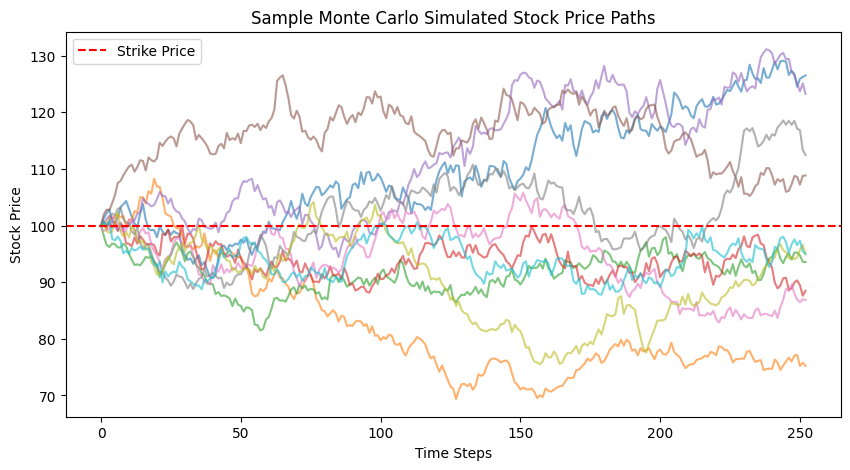

In [ ]:
plt.figure(figsize=(10, 5))
plt.plot(stock_paths[:10, :].T, alpha=0.6)  # Plot first 10 simulated paths
plt.axhline(y=K, color='r', linestyle='--', label="Strike Price")
plt.xlabel("Time Steps")
plt.ylabel("Stock Price")
plt.title("Sample Monte Carlo Simulated Stock Price Paths")
plt.legend()
plt.show()

